<a href="https://colab.research.google.com/github/elianiva/imgpro-compvis/blob/master/week-8/mophology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def dilate_image(image, w):
  """
  dillation without library
  """
  width, height = image.shape
  image_dilated = np.zeros((width, height), dtype=np.uint8)

  SED = np.ones((w, w), dtype=np.uint8)
  constant = (w-1) // 2

  for i in range(constant, width-constant):
    for j in range(constant, height-constant):
      temp = image[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp * SED
      image_dilated[i,j] = np.max(product)
  return image_dilated

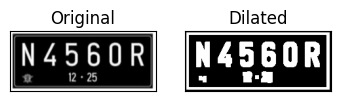

In [10]:
image = cv.imread('/content/plate.png', 0)
ret, thresh = cv.threshold(image, 125, 200, cv.THRESH_BINARY)
w=5
image_dilated = dilate_image(thresh, w)

plt.subplot(131)
plt.imshow(image, cmap = 'gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(image_dilated, cmap = 'gray')
plt.title('Dilated')
plt.xticks([])
plt.yticks([])

plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


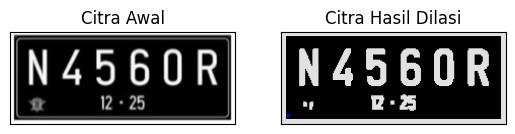

In [11]:
img = cv.imread('/content/plate.png')
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv.dilate(thresh,kernel,iterations = 1)
print(kernel)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])

plt.show()

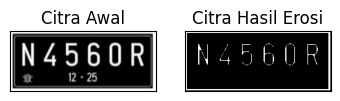

In [20]:
#Erosi Tanpa Library
def erode_image(image,k):
  m, n= image.shape
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2
  image_eroded= np.zeros((m,n), dtype=np.uint8)

  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= image[i-constant:i+constant+1, j-
      constant:j+constant+1]
      product= temp*SE
      image_eroded[i,j]= np.min(product)

  return image_eroded

image = cv.imread('/content/plate.png', 0)
ret1, thresh1 = cv.threshold(image, 175, 225, cv.THRESH_BINARY)
k=3
eroded_image = erode_image(thresh1,k)

plt.subplot(131)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(eroded_image,cmap = 'gray')
plt.title('Citra Hasil Erosi')
plt.xticks([])
plt.yticks([])

plt.show()

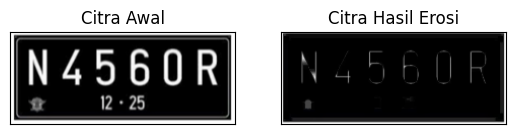

In [22]:
img = cv.imread('/content/plate.png')
kernel = np.ones((5,5), np.uint8)

erosion = cv.erode(img, kernel, iterations = 1)
plt.subplot(121)
plt.imshow(img)
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(erosion)
plt.title('Citra Hasil Erosi')
plt.xticks([])
plt.yticks([])
plt.show()

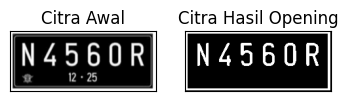

In [27]:
img_o= cv.imread('/content/plate.png', 0)
reto, thresho = cv.threshold(img_o, 127, 225, cv.THRESH_BINARY)
k=3
imgO = dilate_image(erode_image(thresho,k),k)

plt.subplot(131)
plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening')
plt.xticks([])
plt.yticks([])

plt.show()

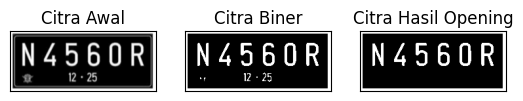

In [26]:
img = cv.imread('/content/plate.png',0)
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
openn = cv.morphologyEx(thresh,cv.MORPH_OPEN, kernel)

plt.subplot(131)
plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(openn, cmap = 'gray')
plt.title('Citra Hasil Opening')
plt.xticks([])
plt.yticks([])

plt.show()

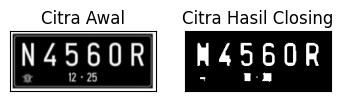

In [28]:
img_c= cv.imread('/content/plate.png', 0)
retc, threshc = cv.threshold(img_c, 127, 225, cv.THRESH_BINARY)
k=7
imgC = erode_image(dilate_image(threshc,k),k)

plt.subplot(131)
plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing')
plt.xticks([])
plt.yticks([])

plt.show()

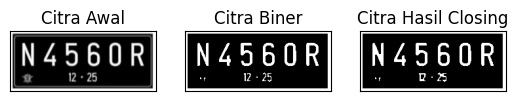

In [29]:
img = cv.imread('/content/plate.png', 0)
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv.morphologyEx(thresh,cv.MORPH_CLOSE, kernel)

plt.subplot(131)
plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing')
plt.xticks([])
plt.yticks([])

plt.show()

SED = Cross 3


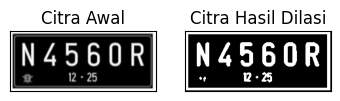

SED = Cross 5


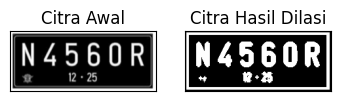

In [34]:
def dilasi_citra(F, w):
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    if w == 3:
        SED = np.array([
            [0, 1, 0],
            [1, 1, 1],
            [0, 1, 0]
        ], dtype=np.uint8)
    elif w == 5:
        SED = np.array([
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0],
            [1, 1, 1, 1, 1],
            [0, 0, 1, 0, 0],
            [0, 0, 1, 0, 0]
        ], dtype=np.uint8)

    constant1 = (w-1)//2

    for i in range(constant1, p-constant1):
        for j in range(constant1, q-constant1):
            temp = F[i-constant1:i+constant1+1,
                    j-constant1:j+constant1+1]
            product = temp * SED
            imgD[i,j] = np.max(product)

    return imgD


# Test with 3x3 cross
print('SED = Cross 3')
img_d = cv.imread('/content/plate.png', 0)
ret, thresh = cv.threshold(img_d, 127, 225, cv.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.xticks([])
plt.yticks([])

plt.show()


# Test with 5x5 cross
print('SED = Cross 5')
img_d = cv.imread('/content/plate.png', 0)
ret, thresh = cv.threshold(img_d, 127, 225, cv.THRESH_BINARY)
w = 5
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.xticks([])
plt.yticks([])

plt.show()

SE = Rectangle 3x5


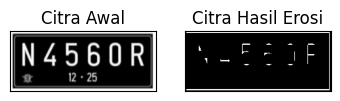

SE = Rectangle 5x7


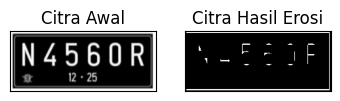

In [36]:
def erosi_citra(F, p, l):
    m, n = F.shape

    SE = cv.getStructuringElement(cv.MORPH_RECT, (p, l))

    constant1 = (l-1)//2
    constant2 = (p-1)//2

    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant1, m-constant1):
        for j in range(constant2, n-constant2):
            temp = F[i-constant1:i+constant1+1,
                    j-constant2:j+constant2+1]
            product = temp * SE
            imgE[i,j] = np.min(product)

    return imgE


# Test with 3x5 rectangle
print('SE = Rectangle 3x5')
img_e = cv.imread('/content/plate.png', 0)
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)

p = 5
l = 3
imgE = erosi_citra(thresh1, p, l)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.xticks([])
plt.yticks([])

plt.show()


# Test with 5x7 rectangle
print('SE = Rectangle 5x7')
img_e = cv.imread('/content/plate.png', 0)
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)

p = 5
l = 3
imgE = erosi_citra(thresh1, p, l)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.xticks([])
plt.yticks([])

plt.show()

SE = Line Vertikal 3


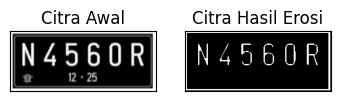

SE = Line Vertikal 5


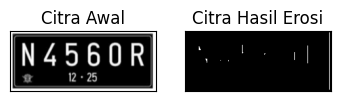

In [37]:
def erosi_citra(F, k):
    m, n = F.shape

    SE = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1, k))

    constant = (k-1)//2
    imgE = np.zeros((m, n), dtype=np.uint8)

    for i in range(constant, m-constant):
        for j in range(constant, n-constant):
            temp = F[i-constant:i+constant+1,
                    j-constant:j+constant+1]
            product = temp * SE
            imgE[i,j] = np.min(product)

    return imgE


print('SE = Line Vertikal 3')
img_e = cv.imread('/content/plate.png', 0)
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)

k = 3
imgE = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.xticks([])
plt.yticks([])

plt.show()

print('SE = Line Vertikal 5')
img_e = cv.imread('/content/plate.png', 0)
ret1, thresh1 = cv.threshold(img_e, 127, 225, cv.THRESH_BINARY)

k = 5
imgE = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.xticks([])
plt.yticks([])

plt.show()

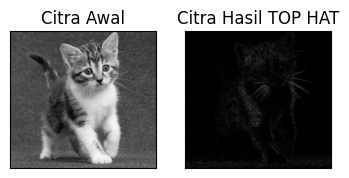

In [38]:
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv.getStructuringElement(cv.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

tophat_img = cv.morphologyEx(img,cv.MORPH_TOPHAT,kernel)

plt.subplot(131)
plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT')
plt.xticks([])
plt.yticks([])

plt.show()

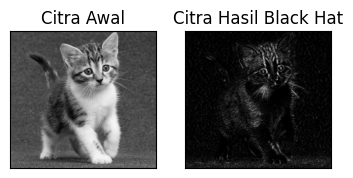

In [39]:
filterSize =(3, 3)
kernel = cv.getStructuringElement(cv.MORPH_RECT, filterSize)

img = cv.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Kernel = cv.getStructuringElement(cv.MORPH_RECT, (13, 5))
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, Kernel)

plt.subplot(131)
plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat')
plt.xticks([])
plt.yticks([])

plt.show()

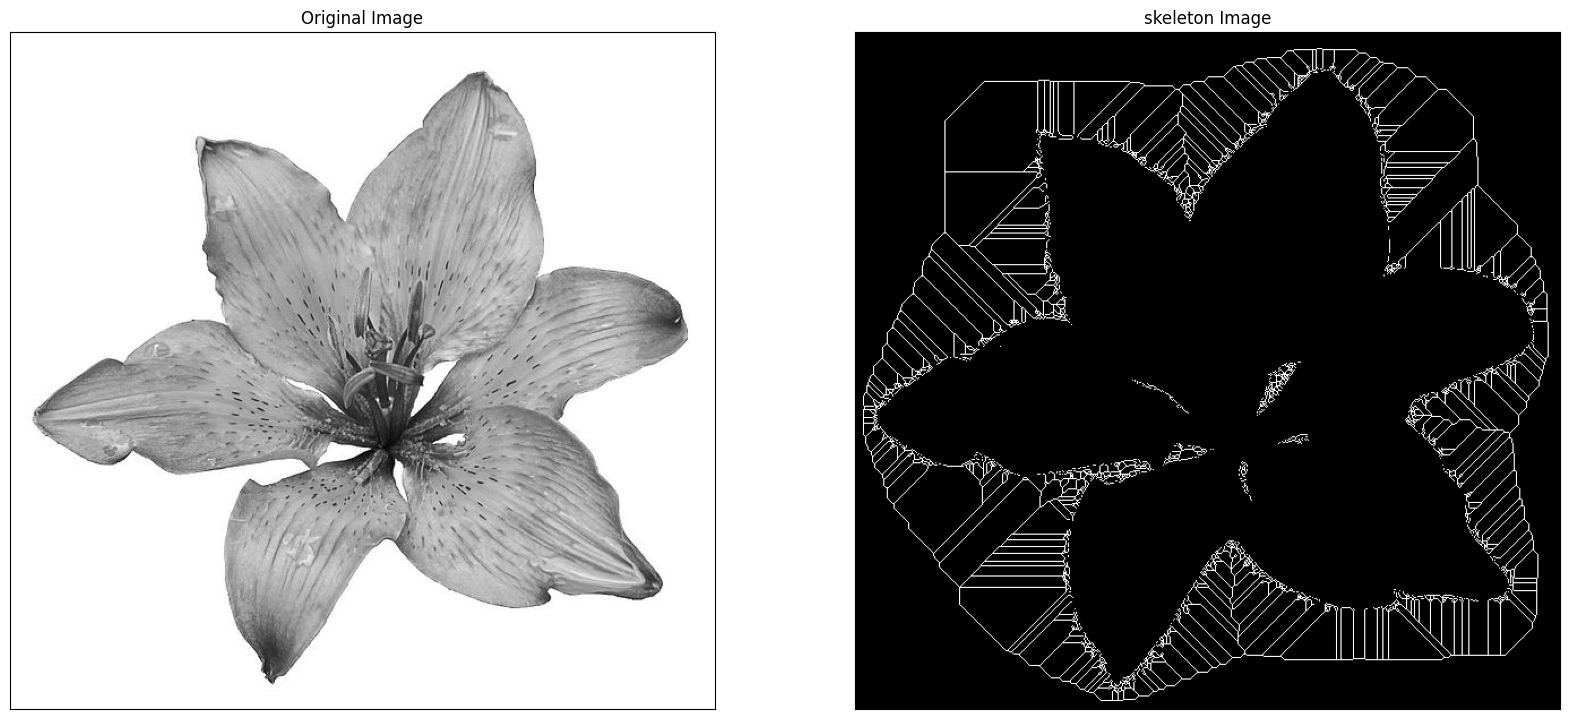

In [40]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg', 0)
binary = img > filters.threshold_triangle(img)

binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

skeleton = skeletonize(binary_cp)

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image')
plt.xticks([])
plt.yticks([])

plt.savefig("binary and bin_skeleton.png")

plt.show()

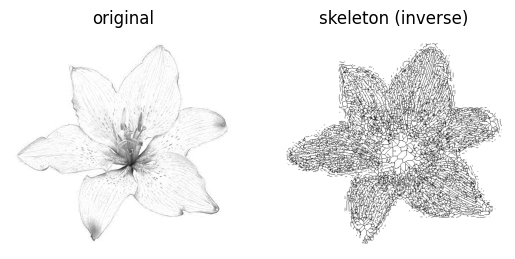

In [41]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

img = io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')[...,0]

binary = img < filters.threshold_triangle(img)

skeleton = skeletonize(binary)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

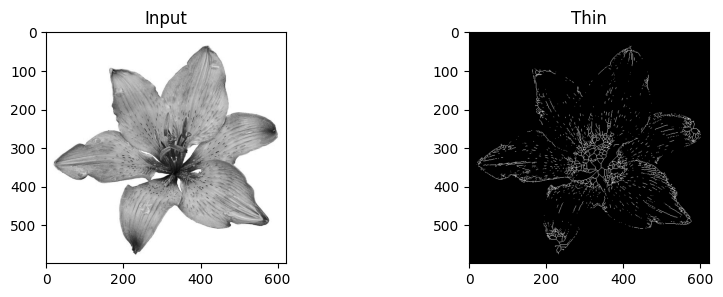

In [43]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))
image_binary = image < 0.5

out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/tmp/char_out.png')
plt.show()

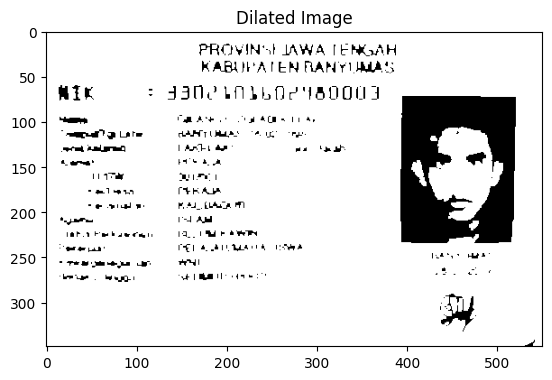

In [45]:
img = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpg', 0)
_, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)

dilated_img = cv.dilate(thresh, kernel, iterations=1)

plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.show()


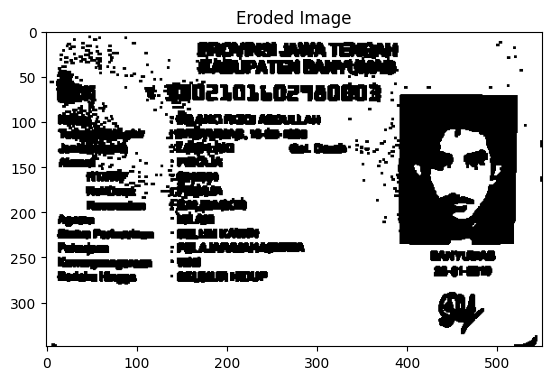

In [46]:
eroded_img = cv.erode(thresh, kernel, iterations=1)

plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.show()

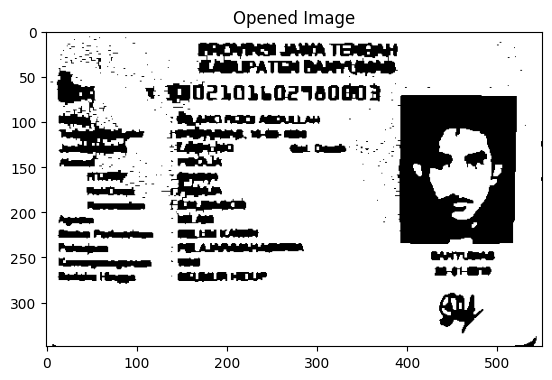

In [48]:
opened_img = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

plt.imshow(opened_img, cmap='gray')
plt.title('Opened Image')
plt.show()

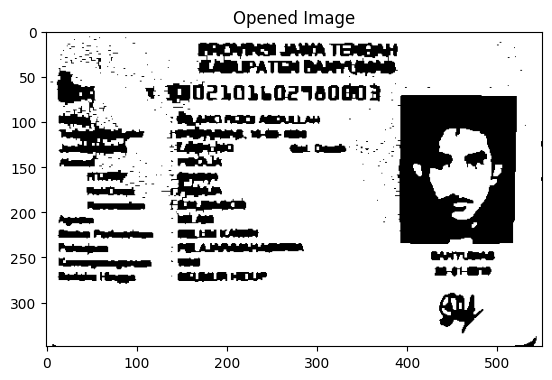

In [50]:
opened_img = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

plt.imshow(opened_img, cmap='gray')
plt.title('Opened Image')
plt.show()

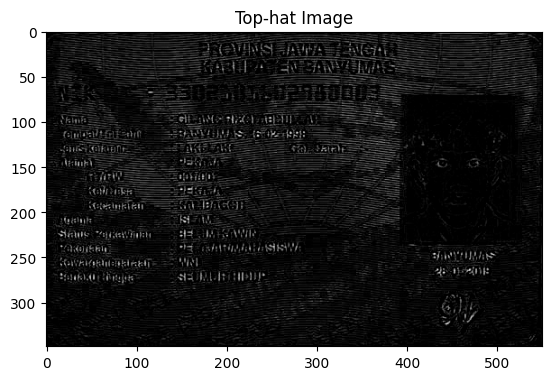

In [51]:
tophat_img = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

plt.imshow(tophat_img, cmap='gray')
plt.title('Top-hat Image')
plt.show()

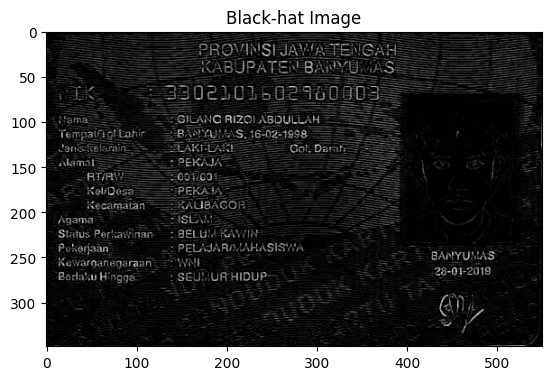

In [52]:
blackhat_img = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

plt.imshow(blackhat_img, cmap='gray')
plt.title('Black-hat Image')
plt.show()

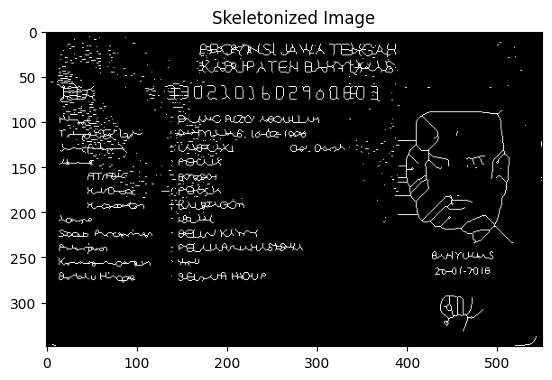

In [53]:
from skimage.morphology import skeletonize

binary_img = img > cv.threshold(img, 127, 255, cv.THRESH_BINARY)[1]
skeleton = skeletonize(binary_img)

plt.imshow(skeleton, cmap='gray')
plt.title('Skeletonized Image')
plt.show()

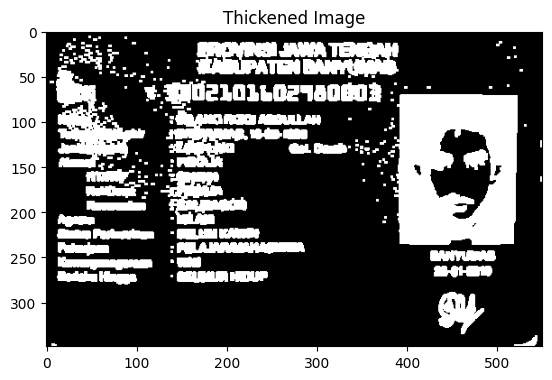

In [54]:
from skimage.morphology import binary_dilation, square

thickened_img = binary_dilation(binary_img, square(3))

plt.imshow(thickened_img, cmap='gray')
plt.title('Thickened Image')
plt.show()